In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
perf = pd.read_pickle('buy_bitcoin.pickle') # read in perf DataFrame
perf.head()

,BTC_USD,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-01 23:59:00+00:00,435.70,0.000003,2.921953e-07,-6.670384e-21,0.012339,0.138503,0.000024,-432.778047,9.999567e+06,435.70,...,0,0,0,NaN,1.000000e+07,0.00,0.00,1,[{u'order_id': u'd93ad9c1cf7e473b9261dc2911bdc...,0.0
2016-01-02 23:59:00+00:00,435.40,0.000004,2.621953e-07,-3.814072e-06,0.011735,0.145202,0.000025,0.000000,9.999567e+06,435.40,...,0,0,0,98.104535,9.999567e+06,435.70,435.70,2,[],0.0
2016-01-03 23:59:00+00:00,431.93,0.000005,-8.480469e-08,-1.672541e-05,0.003625,0.163524,0.000031,0.000000,9.999567e+06,431.93,...,0,0,0,-2.231581,9.999567e+06,435.40,435.40,3,[],0.0
2016-01-04 23:59:00+00:00,433.85,0.000004,-1.827947e-07,-2.642679e-05,0.008133,0.135985,0.000029,-1304.449900,9.998263e+06,1735.40,...,0,0,0,-4.010011,9.999567e+06,431.93,431.93,4,[{u'order_id': u'd93ad9c1cf7e473b9261dc2911bdc...,0.0
2016-01-05 23:59:00+00:00,433.34,0.000004,-3.867947e-07,-2.990823e-05,0.006901,0.120042,0.000030,0.000000,9.998263e+06,1733.36,...,0,0,0,-6.611000,9.998263e+06,1735.40,1735.40,5,[],0.0


Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'BTC price')

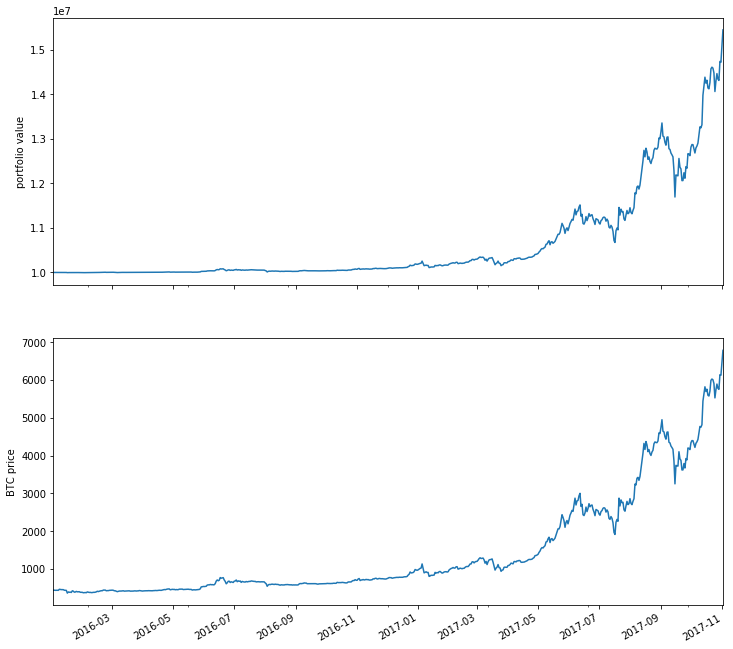

In [6]:
%pylab inline
figsize(12, 12)
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value')
ax2 = plt.subplot(212, sharex=ax1)
perf.BTC_USD.plot(ax=ax2)
ax2.set_ylabel('BTC price')

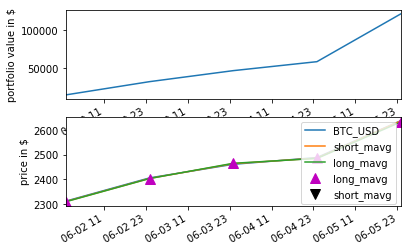

In [14]:
perf = pd.read_pickle('short_long_btc.pickle') # read in perf DataFrame
perf

fig = plt.figure()
ax1 = fig.add_subplot(211)
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('portfolio value in $')

ax2 = fig.add_subplot(212)
perf['BTC_USD'].plot(ax=ax2)
perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

perf_trans = perf.ix[[t != [] for t in perf.transactions]]
buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.ix[
    [t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax2.plot(buys.index, perf.long_mavg.ix[buys.index],
         '^', markersize=10, color='m')
ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
         'v', markersize=10, color='k')
ax2.set_ylabel('price in $')
plt.legend(loc=0)
plt.show()

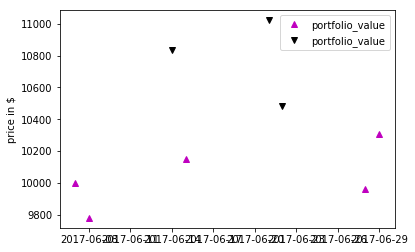

In [5]:
perf = pd.read_pickle('balanced_portfolio.pickle') # read in perf DataFrame
pd.options.display.max_columns = 50

fig = plt.figure()
ax2 = fig.add_subplot(111)
perf_trans = perf.ix[[t != [] for t in perf.transactions]]
buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
sells = perf_trans.ix[
    [t[0]['amount'] < 0 for t in perf_trans.transactions]]
ax2.plot(buys.index, perf.portfolio_value.ix[buys.index],
         '^', markersize=6, color='m')
ax2.plot(sells.index, perf.portfolio_value.ix[sells.index],
         'v', markersize=6, color='k')
ax2.set_ylabel('price in $')
plt.legend(loc=0)
plt.show()

In [7]:
perf.iloc[-1]

algo_volatility                                                     0.473066
algorithm_period_return                                           -0.0233968
alpha                                                                    NaN
benchmark_period_return                                              99.2603
benchmark_volatility                                             8.95312e-16
beta                                                                     NaN
capital_used                                                               0
ending_cash                                                          2426.01
ending_exposure                                                      7340.02
ending_value                                                         7340.02
excess_return                                                              0
gross_leverage                                                      0.751587
long_exposure                                                        7340.02

In [3]:
perf_trans.transactions[1]

[{'amount': 62.550000000000004,
  'commission': None,
  'dt': Timestamp('2017-06-07 05:21:00+0000', tz='UTC'),
  'order_id': '96023bfe80574360b2e38b5f140a5659',
  'price': 0.28001750000000003,
  'sid': Equity(2 [XRP_USD])},
 {'amount': 1.1,
  'commission': None,
  'dt': Timestamp('2017-06-07 21:40:00+0000', tz='UTC'),
  'order_id': 'a355dd7e63e040c58e6d606793bb537c',
  'price': 249.83561375,
  'sid': Equity(1 [ETH_USD])},
 {'amount': 72.775,
  'commission': None,
  'dt': Timestamp('2017-06-07 02:48:00+0000', tz='UTC'),
  'order_id': '96023bfe80574360b2e38b5f140a5659',
  'price': 0.28601787500000003,
  'sid': Equity(2 [XRP_USD])},
 {'amount': 7.5,
  'commission': None,
  'dt': Timestamp('2017-06-07 13:51:00+0000', tz='UTC'),
  'order_id': '96023bfe80574360b2e38b5f140a5659',
  'price': 0.2850178125,
  'sid': Equity(2 [XRP_USD])},
 {'amount': 1.975,
  'commission': None,
  'dt': Timestamp('2017-06-07 22:25:00+0000', tz='UTC'),
  'order_id': 'a355dd7e63e040c58e6d606793bb537c',
  'price': 2